In [47]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
udev            213G     0  213G   0% /dev
tmpfs            43G  4.1G   39G  10% /run
/dev/sda1        62G   32G   30G  52% /
tmpfs           213G  212K  213G   1% /dev/shm
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs           213G     0  213G   0% /sys/fs/cgroup
/dev/sdb1       851G   75G  733G  10% /mnt
tmpfs            43G  204K   43G   1% /run/user/1000


In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import sklearn
from sklearn import metrics
import sklearn.model_selection
import datetime
import time
import os
import math
random.seed(1)
%matplotlib inline

In [49]:
import multiprocessing as mp
mp.cpu_count()

64

In [50]:
# import mine_concept
# import importlib
# from multiprocessing import Pool
# importlib.reload(mine_concept)

In [51]:
DATA_FOLDER = 'CreditScoring-master'

In [52]:
TARGET_NAME = 'Status'

df_train = pd.read_csv(os.path.join(DATA_FOLDER, 'df_train.csv'), index_col=0)
df_test = pd.read_csv(os.path.join(DATA_FOLDER, 'df_test.csv'), index_col=0)

In [53]:
for col in df_train.columns:
    col, df_train[col].value_counts()

('Status', 1    2256
 2     862
 0       1
 Name: Status, dtype: int64)

('Seniority', 0     379
 1     362
 2     312
 3     226
 5     200
 10    171
 4     165
 6     133
 15    120
 8     117
 20     99
 12     89
 7      86
 14     73
 11     70
 13     65
 9      56
 16     45
 25     44
 18     42
 17     38
 30     36
 19     28
 22     26
 23     20
 24     14
 21     14
 28     11
 26     10
 27     10
 40      9
 31      9
 35      7
 29      7
 32      6
 33      4
 36      3
 38      3
 37      3
 43      1
 48      1
 42      1
 41      1
 45      1
 39      1
 47      1
 Name: Seniority, dtype: int64)

('Home', 2    1467
 1     674
 5     553
 6     241
 3     167
 4      14
 0       3
 Name: Home, dtype: int64)

('Time', 60    1333
 36     659
 48     606
 24     259
 12     105
 18      60
 30      40
 6       24
 42      22
 54      10
 72       1
 Name: Time, dtype: int64)

('Age', 28    116
 27    114
 32    113
 30    112
 24    111
 34    109
 37    107
 26    106
 36    104
 31    100
 40     97
 29     95
 23     92
 38     91
 25     90
 39     89
 35     89
 33     89
 41     84
 22     82
 42     73
 43     69
 46     69
 49     65
 45     63
 47     61
 51     60
 50     56
 52     55
 21     53
 44     52
 53     48
 55     46
 48     45
 54     40
 20     36
 56     33
 58     31
 60     28
 61     24
 59     23
 19     21
 57     19
 62     15
 64     12
 63     10
 65      8
 66      7
 18      6
 68      1
 Name: Age, dtype: int64)

('Marital', 2    2256
 1     693
 4      83
 3      58
 5      29
 Name: Marital, dtype: int64)

('Records', 1    2560
 2     559
 Name: Records, dtype: int64)

('Job', 1    1940
 3     730
 2     324
 4     125
 Name: Job, dtype: int64)

('Expenses', 35     866
 45     579
 60     535
 75     406
 90     139
 105     23
 47      22
 57      19
 54      18
 46      18
 70      17
 74      15
 53      14
 58      14
 42      14
 50      14
 44      13
 66      13
 55      13
 59      13
 56      13
 85      12
 43      12
 49      11
 51      11
 52      11
 82      11
 41      10
 77      10
 88       9
       ... 
 113      4
 40       3
 83       3
 64       3
 92       3
 101      3
 102      2
 98       2
 110      2
 38       2
 173      1
 104      1
 180      1
 131      1
 119      1
 115      1
 109      1
 107      1
 39       1
 37       1
 153      1
 106      1
 150      1
 140      1
 130      1
 126      1
 118      1
 114      1
 112      1
 168      1
 Name: Expenses, Length: 90, dtype: int64)

('Income', 0           237
 100         107
 120          83
 150          79
 110          62
 80           62
 90           55
 125          48
 140          48
 130          47
 70           46
 60           46
 160          46
 200          46
 250          40
 105          35
 115          33
 95           30
 75           29
 85           28
 92           27
 170          26
 180          26
 99999999     26
 300          25
 135          25
 145          25
 50           25
 107          24
 128          20
            ... 
 390           1
 384           1
 359           1
 355           1
 196           1
 345           1
 206           1
 226           1
 232           1
 234           1
 248           1
 341           1
 256           1
 264           1
 266           1
 276           1
 288           1
 292           1
 294           1
 296           1
 306           1
 310           1
 312           1
 346           1
 352           1
 356           1
 360           1
 364

('Assets', 0           1130
 4000         231
 5000         196
 3000         189
 3500         137
 6000         116
 8000          99
 10000         93
 7000          84
 2500          77
 2000          73
 4500          57
 15000         49
 12000         41
 99999999      36
 9000          35
 20000         30
 5500          28
 1500          24
 14000         21
 25000         21
 18000         18
 30000         18
 6500          18
 7500          18
 16000         16
 13000         13
 11000         13
 8500          11
 17000         10
             ... 
 11900          1
 3750           1
 53000          1
 3850           1
 16200          1
 4030           1
 44000          1
 7100           1
 13600          1
 875            1
 1434           1
 110000         1
 1600           1
 59000          1
 1750           1
 2100           1
 6200           1
 6300           1
 2250           1
 31000          1
 47500          1
 14800          1
 150000         1
 2600           1


('Debt', 0           2574
 1500          40
 2000          36
 3000          34
 1000          23
 2500          19
 1200          16
 200           16
 500           15
 400           15
 300           14
 99999999      13
 900           11
 800           11
 4000          10
 600           10
 700           10
 1700           9
 5000           8
 4500           8
 3500           7
 350            7
 1300           7
 1800           7
 1600           6
 100            6
 1100           5
 50             5
 2800           5
 2400           5
             ... 
 1728           1
 1750           1
 2100           1
 45             1
 6000           1
 1950           1
 1978           1
 1980           1
 325            1
 1250           1
 39             1
 6500           1
 672            1
 991            1
 23500          1
 933            1
 2880           1
 770            1
 792            1
 2850           1
 15000          1
 870            1
 2520           1
 960            1
 4

('Amount', 1000    367
 1500    155
 1100    154
 800     148
 1200    146
 1300    138
 600     134
 900     132
 500     129
 700     118
 1400    109
 400      79
 1250     61
 1350     57
 1150     56
 850      55
 1600     53
 750      51
 2000     48
 950      47
 650      46
 300      39
 1450     36
 1800     36
 1700     35
 450      35
 1050     34
 200      31
 250      26
 350      26
        ... 
 983       1
 1126      1
 1460      1
 1120      1
 2380      1
 1078      1
 1035      1
 1055      1
 1065      1
 1048      1
 949       1
 1270      1
 1298      1
 943       1
 1442      1
 1440      1
 1426      1
 1897      1
 887       1
 1390      1
 1380      1
 915       1
 933       1
 1332      1
 1330      1
 1320      1
 1318      1
 1310      1
 1308      1
 1033      1
 Name: Amount, Length: 246, dtype: int64)

('Price', 1200    35
 1600    31
 1500    30
 1400    29
 1700    28
 1300    28
 1100    26
 950     22
 550     22
 1350    22
 800     21
 1000    19
 1150    19
 850     18
 1800    18
 1250    17
 1850    17
 700     16
 1450    16
 650     16
 975     16
 750     16
 500     15
 1650    14
 600     14
 400     13
 450     12
 1550    12
 900     12
 875     11
         ..
 2216     1
 2212     1
 2206     1
 2202     1
 2194     1
 2354     1
 2360     1
 2362     1
 2440     1
 2504     1
 2502     1
 5000     1
 435      1
 2478     1
 2472     1
 2468     1
 2460     1
 2448     1
 2438     1
 6468     1
 2436     1
 2432     1
 2428     1
 2420     1
 2414     1
 365      1
 363      1
 6500     1
 355      1
 4100     1
 Name: Price, Length: 1226, dtype: int64)

In [54]:
categ_features = ['Home', 'Marital', 'Job']

In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(df_train[categ_features])

df_train_categ = pd.DataFrame(ohe.transform(df_train[categ_features])).astype(int)
df_test_categ = pd.DataFrame(ohe.transform(df_test[categ_features])).astype(int)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)

In [56]:
df_train_categ.columns

RangeIndex(start=0, stop=16, step=1)

In [57]:
for i in range(16):
    df_train[i] = df_train_categ.values.astype(int)[:,i]
    df_test[i] = df_test_categ.values.astype(int)[:,i]

In [58]:
df_train.drop(categ_features, axis=1, inplace=True)
df_test.drop(categ_features, axis=1, inplace=True)

In [59]:
df_train.loc[(df_train['Income'] == 0) | (df_train['Income'] == 99999999), 'Income'] = np.nan
df_train.loc[(df_train['Assets'] == 99999999), 'Assets'] = np.nan
df_train.loc[(df_train['Debt'] == 99999999), 'Debt'] = np.nan

df_test.loc[(df_test['Income'] == 0) | (df_test['Income'] == 99999999), 'Income'] = np.nan
df_test.loc[(df_test['Assets'] == 99999999), 'Assets'] = np.nan
df_test.loc[(df_test['Debt'] == 99999999), 'Debt'] = np.nan

In [60]:
df_train = df_train.query(TARGET_NAME + "!= 0")
df_test = df_test.query(TARGET_NAME + "!= 0")

df_train[TARGET_NAME] = df_train[TARGET_NAME].replace({1:0, 2:1})
df_test[TARGET_NAME] = df_test[TARGET_NAME].replace({1:0, 2:1})

y_train = df_train[TARGET_NAME]
y_test = df_test[TARGET_NAME]

df_train_pos = df_train[df_train[TARGET_NAME]==1].drop(TARGET_NAME,axis=1)
df_train_neg = df_train[df_train[TARGET_NAME]==0].drop(TARGET_NAME,axis=1)

df_train_pos.head()

,Seniority,Time,Age,Records,Expenses,Income,Assets,Debt,Amount,Price,...,6,7,8,9,10,11,12,13,14,15
2,10,36,46,2,90,200.0,3000.0,0.0,2000,2985,...,0,0,1,0,0,0,0,0,1,0
9,0,48,41,1,90,80.0,0.0,0.0,1200,1468,...,0,0,1,0,0,0,0,1,0,0
18,0,48,36,1,45,130.0,750.0,0.0,1100,1511,...,0,0,1,0,0,0,0,1,0,0
20,2,60,25,1,46,107.0,0.0,0.0,1500,2189,...,0,1,0,0,0,0,1,0,0,0
22,1,60,45,1,105,112.0,2000.0,500.0,600,1332,...,0,0,1,0,0,0,0,1,0,0


In [62]:
df_train.shape
df_test.shape

(3118, 27)

(1336, 27)

In [63]:
df_train = df_train.drop(TARGET_NAME,axis=1)
df_test = df_test.drop(TARGET_NAME,axis=1)

In [64]:
df_train_pos.to_csv(os.path.join(DATA_FOLDER, 'df_train_pos.csv'))
df_train_neg.to_csv(os.path.join(DATA_FOLDER, 'df_train_neg.csv'))

In [65]:
df_train_pos = pd.read_csv(os.path.join(DATA_FOLDER, 'df_train_pos.csv'),index_col=0)
df_train_neg = pd.read_csv(os.path.join(DATA_FOLDER, 'df_train_neg.csv'),index_col=0)

In [66]:
df_train_pos.head()

,Seniority,Time,Age,Records,Expenses,Income,Assets,Debt,Amount,Price,...,6,7,8,9,10,11,12,13,14,15
2,10,36,46,2,90,200.0,3000.0,0.0,2000,2985,...,0,0,1,0,0,0,0,0,1,0
9,0,48,41,1,90,80.0,0.0,0.0,1200,1468,...,0,0,1,0,0,0,0,1,0,0
18,0,48,36,1,45,130.0,750.0,0.0,1100,1511,...,0,0,1,0,0,0,0,1,0,0
20,2,60,25,1,46,107.0,0.0,0.0,1500,2189,...,0,1,0,0,0,0,1,0,0,0
22,1,60,45,1,105,112.0,2000.0,500.0,600,1332,...,0,0,1,0,0,0,0,1,0,0


In [67]:
df_train_neg.shape

(2256, 26)

In [68]:
X_pos = df_train_pos.values
X_neg = df_train_neg.values
X_test = df_test.values

In [69]:
X_test.shape

(1336, 26)

### PatternStructuresMiner

In [21]:
def nunique_percol_sort(a):
    """Number of unique values in a row of array"""
    b = np.sort(a,axis=1)
    return (b[:,1:] != b[:,:-1]).sum(axis=1)+1

class PatternStructuresMiner():
    """
    Basic class to explore intersections of objects and build hypotheses
    """
    def __init__(self, data_pos, data_neg, feature_list):
        """
        :param data_pos: Pandas.DataFrame with objects from class 1
        :param data_neg: Pandas.DataFrame with objects from class 0
        :param feature_list: list of column names used as features
        """
        self.data_pos = data_pos[feature_list]
        self.data_neg = data_neg[feature_list]
        self.X_pos_expanded = np.expand_dims(self.data_pos.values, 0)
        self.X_neg_expanded = np.expand_dims(self.data_neg.values, 0)
        self.feature_list = feature_list
        self.is_nan_X_pos_expanded = np.isnan(self.X_pos_expanded)
        self.is_nan_X_neg_expanded = np.isnan(self.X_neg_expanded)
    
    def mine_obj_intersections(self, n_obj, subs_size, concepts_type):
        # np.random.choice is too slow
        print("Mining {} intersections".format(n_obj))
        data = self.data_pos if concepts_type == 'pos' else self.data_neg
        indexes = np.random.randint(0, data.shape[0], size=(n_obj, subs_size))

        # provide objects in subsamples are unique
        n_unique = nunique_percol_sort(indexes)
        indexes = indexes[n_unique == subs_size]
        
        # left & right borders of interval pattern structures
        concepts_min = np.expand_dims(np.nanmin(data.values[indexes], axis=1), 1)
        concepts_max = np.expand_dims(np.nanmax(data.values[indexes], axis=1), 1)

        # 
        num_neg_objs_in_concepts = ((((concepts_min <= self.X_neg_expanded) | np.isnan(concepts_min)) & 
                                    ((concepts_max >= self.X_neg_expanded) | np.isnan(concepts_max))) | 
                                    self.is_nan_X_neg_expanded).all(axis=2).sum(axis=1)
        num_pos_objs_in_concepts = ((((concepts_min <= self.X_pos_expanded) | np.isnan(concepts_min)) & 
                                    ((concepts_max >= self.X_pos_expanded) | np.isnan(concepts_max))) | 
                                    self.is_nan_X_pos_expanded).all(axis=2).sum(axis=1)
        
        # stats
        pos_support = num_pos_objs_in_concepts / self.data_pos.shape[0]
        neg_support = num_neg_objs_in_concepts / self.data_neg.shape[0]
        pos_confidence = num_pos_objs_in_concepts / (num_pos_objs_in_concepts + num_neg_objs_in_concepts) 
        neg_confidence = num_neg_objs_in_concepts / (num_pos_objs_in_concepts + num_neg_objs_in_concepts) 
        
#         print("Mining obj Finished")
        return concepts_min[:,0,:], concepts_max[:,0,:], \
                pd.DataFrame({'N_pos_in_concepts':num_pos_objs_in_concepts,
                              'N_neg_in_concepts':num_neg_objs_in_concepts,
                              'concepts_type':[concepts_type]*num_pos_objs_in_concepts.shape[0],
                              'subs_size':[subs_size]*num_pos_objs_in_concepts.shape[0],
                              'N_pos_all':[self.data_pos.shape[0]]*num_pos_objs_in_concepts.shape[0],
                              'N_neg_all':[self.data_neg.shape[0]]*num_pos_objs_in_concepts.shape[0],
                              'pos_support' : pos_support,
                              'neg_support' : neg_support,
                              'pos_confidence' : pos_confidence,
                              'neg_confidence' : neg_confidence
                               })
    
    
    def mine_hypotheses(self, alpha, hypo_type, subs_size,
                      N_hypo_need = None, N_iterations = None, batch_size = 1000, save_path = None):
        N_mined_hypo = 0
        hypotheses_min_LIST = []
        hypotheses_max_LIST = []
        iter_total = 0
        
        while N_mined_hypo < N_hypo_need:
            concepts_min, concepts_max, stats_concepts = self.mine_obj_intersections(batch_size, subs_size, hypo_type)
            good_hypos_idxs = stats_concepts.query(hypo_type + "_confidence >= " + str(alpha)).index
            hypotheses_min_LIST.append(concepts_min[good_hypos_idxs])
            hypotheses_max_LIST.append(concepts_max[good_hypos_idxs])
            N_mined_hypo += good_hypos_idxs.shape[0]
            print("N_mined_hypos of type " + hypo_type, N_mined_hypo)
            iter_total += batch_size
            if N_iterations and iter_total >= N_iterations:
                break
            
        hypotheses_min = np.concatenate(hypotheses_min_LIST)
        hypotheses_max = np.concatenate(hypotheses_max_LIST)
        if N_hypo_need:
            hypotheses_min = hypotheses_min[:N_hypo_need]
            hypotheses_max = hypotheses_max[:N_hypo_need]
        
        if save_path:
            pd.DataFrame(hypotheses_min).to_csv(os.path.join(save_path, "hypotheses_min.csv"), header=None, index=None)
            pd.DataFrame(hypotheses_max).to_csv(os.path.join(save_path, "hypotheses_max.csv"), header=None, index=None)
        
        return hypotheses_min, hypotheses_max
        


In [22]:
features = ['Seniority', 'Time', 'Age', 'Records',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'] + list(map(str,range(16)))

In [23]:
%%time
PSM = PatternStructuresMiner(df_train_pos, df_train_neg, features)

CPU times: user 6.21 ms, sys: 1.06 ms, total: 7.27 ms
Wall time: 5.87 ms


In [24]:
# %%time
# _, _, stats_concepts_pos = PSM.mine_obj_intersections(10000, 3, 'pos')
# _, _, stats_concepts_neg = PSM.mine_obj_intersections(10000, 3, 'neg')

### Mine positive hypotheses

Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


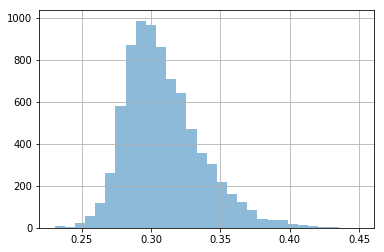

In [25]:
_, _, stats_concepts_pos = PSM.mine_obj_intersections(10000, 20, 'pos')
stats_concepts_pos['pos_confidence'].hist(alpha = 0.5, bins = 30)

In [189]:
%%time
from sklearn.model_selection import ParameterGrid
import multiprocessing

param_grid = {
    'subs_size': list(range(2,21)),
    'alpha': np.linspace(0,1,21), 
    'hypo_type' : ['pos'],
    'N_hypo_need' : [10000],
    'N_iterations' : [20000],
    'batch_size' : [10000],
}

### WARNING! round(params['alpha'], 4) ---> for readable folder names
MyParamGrid = []
for params in ParameterGrid(param_grid):
    save_path = os.path.join(DATA_FOLDER, 
                             'Hypotheses',
                             params['hypo_type'] + '_' + 
                             str(params['subs_size']) + '_' + 
                             str(round(params['alpha'], 4)))
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    params['save_path'] = save_path
    MyParamGrid.append(params)

pool = multiprocessing.Pool(processes=60) #use all available cores, otherwise specify the number you want as an argument
for args in MyParamGrid:
    pool.apply_async(PSM.mine_hypotheses, args=(args['alpha'],
                                                args['hypo_type'],
                                                args['subs_size'],
                                                args['N_hypo_need'],
                                                args['N_iterations'],
                                                args['batch_size'],
                                                args['save_path'],
                                               ))
pool.close()
pool.join()

Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equa

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-package

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-pack

N_mined_hypos of type pos 8558
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9675
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 8838
N_mined_hypos of type pos 9307
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9428
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9675


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8023


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 9992
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipyk

N_mined_hypos of type pos 9023
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/i

N_mined_hypos of type pos 8712


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykern

N_mined_hypos of type pos 8250
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type pos 8023
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8250
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8250
N_mined_hypos of type pos 9943


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8712


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8414


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9506
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/sit

N_mined_hypos of type pos 9587
Mining 10000 intersections
N_mined_hypos of type pos 8838
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9188
N_mined_hypos of type pos 9842
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9771
Mining 10000 intersections
N_mined_hypos of type pos 9587
Mining 10000 intersections
N_mined_hypos of type pos 8712
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8558
Mining 10000 intersections
N_mined_hypos of type pos 9771
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9428
N_mined_hypos of type pos 9188
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8558
N_mined_hypos of type pos 9506
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 8414
Mining 10000 intersections
N_mined_hypos of type pos 8414
N_mined_hypos of type pos 9870
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 8023


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
N_mined_hypos of type pos 9023
Mining 10000 intersections
N_mined_hypos of type pos 9842
N_mined_hypos of type pos 9771
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9898
N_mined_hypos of type pos 9188
N_mined_hypos of type pos 9307
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9967
N_mined_hypos of type pos 9307
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type pos 9587
Mining 10000 intersections
N_mined_hypos of type pos 9428
Mining 10000 intersections
N_mined_hypos of type pos 9943
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 9870
Mining 10000 intersections
N_mined_hypos of type pos 9842
Mining 10000 intersections
N_mined_hypos of type pos 8838
N_mined_hypos of type pos 9967
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9023
Mining 10000 intersections
N_mined_hypos of type pos 9976
Mining 10000 intersections
N_mined_hypos of type pos 9506
Mining 10000 intersections
N_mined_hypos of type pos 9870
Mining 10000 intersections
N_mined_hypos of type pos 9675
Mining 10000 intersections
N_mined_hypos of type pos 9963
Mining 10000 intersections
N_mined_hypos of type pos 9943
N_mined_hypos of type pos 9992
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9897
N_mined_hypos of type pos 9992
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 17142
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 16066
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 16066
N_mined_hypos of type pos 16464
N_mined_hypos of type pos 19354
N_mined_hypos of type pos 17412
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 19768


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 16464
N_mined_hypos of type pos 19984
N_mined_hypos of type pos 17652
N_mined_hypos of type pos 16464
N_mined_hypos of type pos 18037
N_mined_hypos of type pos 16821
N_mined_hypos of type pos 16821
N_mined_hypos of type pos 17412
N_mined_hypos of type pos 18764
N_mined_hypos of type pos 18573
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 19354


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 19010
N_mined_hypos of type pos 16821
Mining 10000 intersections
N_mined_hypos of type pos 17412
Mining 10000 intersections
N_mined_hypos of type pos 17142
N_mined_hypos of type pos 17652
N_mined_hypos of type pos 17142
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 18037
Mining 10000 intersections
N_mined_hypos of type pos 16066
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 19872
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 19170
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 19010
N_mined_hypos of type pos 18318
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 18037
N_mined_hypos of type pos 19354
N_mined_hypos of type pos 19170
N_mined_hypos of type pos 19919
Mining 10000 intersections
N_mined_hypos of type pos 18318


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 18573
N_mined_hypos of type pos 19547
N_mined_hypos of type pos 19872
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 18764


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 19010
Mining 10000 intersections
N_mined_hypos of type pos 19932
N_mined_hypos of type pos 17652
N_mined_hypos of type pos 19547
N_mined_hypos of type pos 19678
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 19868
N_mined_hypos of type pos 19982
N_mined_hypos of type pos 18764
Mining 10000 intersections
N_mined_hypos of type pos 19170
N_mined_hypos of type pos 19678
Mining 10000 intersections
N_mined_hypos of type pos 18318
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 19768
Mining 10000 intersections
N_mined_hypos of type pos 19678
N_mined_hypos of type pos 19803
N_mined_hypos of type pos 19547
Mining 10000 intersections
N_mined_hypos of type pos 19932
N_mined_hypos of type pos 18573
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 19768
Mining 10000 intersections
N_mined_hypos of type pos 19948
N_mined_hypos of type pos 19984
Mining 10000 intersections
N_mined_hypos of type pos 19780
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9867
Mining 10000 intersections
N_mined_hypos of type pos 8422
Mining 10000 intersections
N_mined_hypos of type pos 9845
Mining 10000 intersections
N_mined_hypos of type pos 9690
Mining 10000 intersections
N_mined_hypos of type pos 9524
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 8620
Mining 10000 intersections
N_mined_hypos of type pos 9785
Mining 10000 intersections
N_mined_hypos of type pos 8255
Mining 10000 intersections
N_mined_hypos of type pos 8534
Mining 10000 intersections
N_mined_hypos of type pos 9260
Mining 10000 intersections
N_mined_hypos of type pos 9073
Mining 10000 intersections
N_mined_hypos of type pos 9581
Mining 10000 intersections
N_mined_hypos of type pos 9714
Mining 10000 intersections
N_mined_hypos of type pos 9855
Mining 10000 intersections
N_mined_hypos of type pos 8062
Mining 10000 intersections
N_mined_hypos of type pos 9463
N_mined_hypos of type pos 9600
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9271
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 8768
Mining 10000 intersections
N_mined_hypos of type pos 9446
Mining 10000 intersections
N_mined_hypos of type pos 9776
Mining 10000 intersections
N_mined_hypos of type pos 9152
Mining 10000 intersections
N_mined_hypos of type pos 8898
Mining 10000 intersections
N_mined_hypos of type pos 9273
Mining 10000 intersections
N_mined_hypos of type pos 9405
Mining 10000 intersections
N_mined_hypos of type pos 8407
Mining 10000 intersections
N_mined_hypos of type pos 9005
Mining 10000 intersections
N_mined_hypos of type pos 8727
Mining 10000 intersections
N_mined_hypos of type pos 9727
Mining 10000 intersections
N_mined_hypos of type pos 9498
Mining 10000 intersections
N_mined_hypos of type pos 8079
Mining 10000 intersections
N_mined_hypos of type pos 8197
Mining 10000 intersections
N_mined_hypos of type pos 8860
Mining 10000 intersections
N_mined_hypos of type pos 9311
Mining 10000 intersections
N_mined_hypos of type pos 9134
N_mined_hypos of type pos 9921
Mining 100

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 8198
Mining 10000 intersections
N_mined_hypos of type pos 9188
Mining 10000 intersections
N_mined_hypos of type pos 9729
Mining 10000 intersections
N_mined_hypos of type pos 7998
Mining 10000 intersections
N_mined_hypos of type pos 9204
Mining 10000 intersections
N_mined_hypos of type pos 9300
Mining 10000 intersections
N_mined_hypos of type pos 8489
Mining 10000 intersections
N_mined_hypos of type pos 8310
N_mined_hypos of type pos 9267
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 9009
Mining 10000 intersections
N_mined_hypos of type pos 8808
Mining 10000 intersections
N_mined_hypos of type pos 9111
Mining 10000 intersections
N_mined_hypos of type pos 8630
Mining 10000 intersections
N_mined_hypos of type pos 9296
Mining 10000 intersections
N_mined_hypos of type pos 9246
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 7823
Mining 10000 intersections
N_mined_hypos of type pos 8893
Mining 10000 intersections
N_mined_hypos of type pos 9746
Mining 10000 intersections
N_mined_hypos of type pos 8376
Mining 10000 intersections
N_mined_hypos of type pos 8883
Mining 10000 intersections
N_mined_hypos of type pos 8011
Mining 10000 intersections
N_mined_hypos of type pos 7731
Mining 10000 intersections
N_mined_hypos of type pos 19731
Mining 10000 intersections
N_mined_hypos of type pos 16828
N_mined_hypos of type pos 18580
Mining 10000 intersections
N_mined_hypos of type pos 17154
Mining 10000 intersections
N_mined_hypos of type pos 17158
N_mined_hypos of type pos 19688
N_mined_hypos of type pos 16455
N_mined_hypos of type pos 18025
N_mined_hypos of type pos 19497
N_mined_hypos of type pos 19398
N_mined_hypos of type pos 19046
N_mined_hypos of type pos 18956
N_mined_hypos of type pos 18297
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 int

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 19733
N_mined_hypos of type pos 17774
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 19509
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 18011
N_mined_hypos of type pos 19316
N_mined_hypos of type pos 18547
N_mined_hypos of type pos 16978
Mining 10000 intersections
N_mined_hypos of type pos 16686
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 18570
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 19458
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 18212
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 18365


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 17838
Mining 10000 intersections
N_mined_hypos of type pos 19446
N_mined_hypos of type pos 18448
N_mined_hypos of type pos 15750
N_mined_hypos of type pos 18519
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 19861
N_mined_hypos of type pos 17611
N_mined_hypos of type pos 17284
Mining 10000 intersections
N_mined_hypos of type pos 16741
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 18522
N_mined_hypos of type pos 19501
Mining 10000 intersections
N_mined_hypos of type pos 18589
N_mined_hypos of type pos 17841
N_mined_hypos of type pos 15526
N_mined_hypos of type pos 16085
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 1387


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 14020
Mining 10000 intersections
N_mined_hypos of type pos 1551
N_mined_hypos of type pos 7078
N_mined_hypos of type pos 19157
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1889
N_mined_hypos of type pos 2509
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 5268
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 2767
N_mined_hypos of type pos 189
Mining 10000 intersections
N_mined_hypos of type pos 8925
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 7056
Mining 10000 intersections
N_mined_hypos of type pos 2285
N_mined_hypos of type pos 6246
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 3912
N_mined_hypos of type pos 3241
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 5361
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 5583


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 94
Mining 10000 intersections
N_mined_hypos of type pos 12628
N_mined_hypos of type pos 241
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1894
N_mined_hypos of type pos 9266
N_mined_hypos of type pos 11400
Mining 10000 intersections
N_mined_hypos of type pos 10268
N_mined_hypos of type pos 8183
Mining 10000 intersections
N_mined_hypos of type pos 132
Mining 10000 intersections
N_mined_hypos of type pos 506
N_mined_hypos of type pos 14199
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 3354
Mining 10000 intersections
N_mined_hypos of type pos 347
Mining 10000 intersections
N_mined_hypos of type pos 710
N_mined_hypos of type pos 4325
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 18950
N_mined_hypos of type pos 1059
N_mined_hypos of type pos 11188
Mining 10000 intersections
Mining 1000

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 24
Mining 10000 intersections
N_mined_hypos of type pos 9
Mining 10000 intersections
N_mined_hypos of type pos 18105
N_mined_hypos of type pos 1
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 401
Mining 10000 intersections
N_mined_hypos of type pos 1
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 3
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 215
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 5
Mining 10000 intersections
N_mined_hypos of type pos 635
N_mined_hypos of type pos 68
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 5835
N_mined_hypos of type 

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 0
N_mined_hypos of type pos 812
Mining 10000 intersections
N_mined_hypos of type pos 1518
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1469
N_mined_hypos of type pos 0
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 9
N_mined_hypos of type pos 17093
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 88
Mining 10000 intersections
N_mined_hypos of type pos 238
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 61
Mining 10000 intersections
N_mined_hypos of type p

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 0
N_mined_hypos of type pos 42
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 2087
Mining 10000 intersections
N_mined_hypos of type pos 6
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 336
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 2
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 81
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 2


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 336
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
N_mined_hypos of type pos 5
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 1501
N_mined_hypos of type pos 5891
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 16150
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 29
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 0


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 4611
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 197
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 7
Mining 10000 intersections
N_mined_hypos of type pos 14085
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
N_mined_hypos of type pos 917
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 1
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
N_mined_hypos of type pos 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 977
Mining 10000 intersections
N_mined_hypos of type pos 0
Mining 10000 intersections
N_mined_hypos of type pos 6448
Mining 10000 intersections
N_min

### Mine negative hypotheses

Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


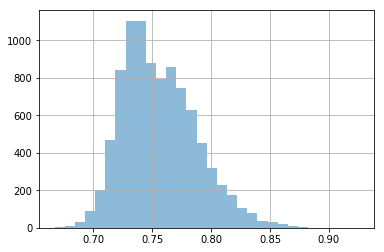

In [190]:
_, _, stats_concepts_pos = PSM.mine_obj_intersections(10000, 20, 'neg')
stats_concepts_pos['neg_confidence'].hist(alpha = 0.5, bins = 30)

In [191]:
'alpha', np.linspace(0.7,1,31)

('alpha',
 array([0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 ,
        0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91,
        0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ]))

In [192]:
%%time
from sklearn.model_selection import ParameterGrid
import multiprocessing

param_grid = {
    'subs_size': list(range(2,21)),
    'alpha': np.linspace(0.7,1,31), 
    'hypo_type' : ['neg'],
    'N_hypo_need' : [10000],
    'N_iterations' : [20000],
    'batch_size' : [10000],
}

### WARNING! round(params['alpha'], 4) ---> for readable folder names
MyParamGrid = []
for params in ParameterGrid(param_grid):
    save_path = os.path.join(DATA_FOLDER, 
                             'Hypotheses',
                             params['hypo_type'] + '_' + 
                             str(params['subs_size']) + '_' + 
                             str(round(params['alpha'], 4)))
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    params['save_path'] = save_path
    MyParamGrid.append(params)


pool = multiprocessing.Pool(processes=60) #use all available cores, otherwise specify the number you want as an argument
for args in MyParamGrid:
    pool.apply_async(PSM.mine_hypotheses, args=(args['alpha'],
                                                args['hypo_type'],
                                                args['subs_size'],
                                                args['N_hypo_need'],
                                                args['N_iterations'],
                                                args['batch_size'],
                                                args['save_path'],
                                               ))
pool.close()
pool.join()

Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountere

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-package

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-pack

N_mined_hypos of type neg 9119
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/i

N_mined_hypos of type neg 9293


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/i

N_mined_hypos of type neg 9376
N_mined_hypos of type neg 9404
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type neg 9239
Mining 10000 intersections
N_mined_hypos of type neg 9368
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type neg 9119
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/i

N_mined_hypos of type neg 9216
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/i

N_mined_hypos of type neg 9331


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections
N_mined_hypos of type neg 9385


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9231
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type neg 9072
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal


N_mined_hypos of type neg 9371
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-p

N_mined_hypos of type neg 9291
Mining 10000 intersections
N_mined_hypos of type neg 9378
Mining 10000 intersections
N_mined_hypos of type neg 8882
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9245
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9145


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9217
Mining 10000 intersections
N_mined_hypos of type neg 9071
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9142
N_mined_hypos of type neg 9435
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9395
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8930
N_mined_hypos of type neg 8313
N_mined_hypos of type neg 8462
Mining 10000 intersections
N_mined_hypos of type neg 9221
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8374
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 8792
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9114
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9099
Mining 10000 intersections
N_mined_hypos of type neg 8883
Mining 10000 intersections
N_mined_hypos of type neg 8671
N_mined_hypos of type neg 9100
Mining 10000 intersections
N_mined_hypos of type neg 8981
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
N_mined_hypos of type neg 8748
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


N_mined_hypos of type neg 9167


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


Mining 10000 intersections
N_mined_hypos of type neg 9420
Mining 10000 intersections
N_mined_hypos of type neg 8920
Mining 10000 intersections
N_mined_hypos of type neg 8633
Mining 10000 intersections
N_mined_hypos of type neg 8933
Mining 10000 intersections
N_mined_hypos of type neg 9469
Mining 10000 intersections
N_mined_hypos of type neg 9111
Mining 10000 intersections
N_mined_hypos of type neg 8428
Mining 10000 intersections
N_mined_hypos of type neg 8535
Mining 10000 intersections
N_mined_hypos of type neg 8951
Mining 10000 intersections
N_mined_hypos of type neg 9452
Mining 10000 intersections
N_mined_hypos of type neg 8976
Mining 10000 intersections
N_mined_hypos of type neg 9159
Mining 10000 intersections
N_mined_hypos of type neg 9135
Mining 10000 intersections
N_mined_hypos of type neg 8931
N_mined_hypos of type neg 9388
Mining 10000 intersections
N_mined_hypos of type neg 8647
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8986
Mining 10000 i

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 18243
N_mined_hypos of type neg 18803
N_mined_hypos of type neg 18762
N_mined_hypos of type neg 16890
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 18691
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 18791
Mining 10000 intersections
N_mined_hypos of type neg 18619
N_mined_hypos of type neg 18455
N_mined_hypos of type neg 18386
N_mined_hypos of type neg 18402
Mining 10000 intersections
N_mined_hypos of type neg 18243
N_mined_hypos of type neg 17817
N_mined_hypos of type neg 18117
N_mined_hypos of type neg 18457
N_mined_hypos of type neg 17593
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 18620
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 18087
N_mined_hypos of type neg 16713
N_mined_hypos of type neg 18179
N_mined_hypos of type neg 18242
N_mined_hypos of type neg 18406
N_mined_hypos of type neg 18778
N_mined_hypos of type neg 18563
Mining 10000 intersections
N_mined_hypos of type neg 18259
N_mined_hypos of type neg 18173
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 17814
N_mined_hypos of type neg 18839

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 17826
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 17367
N_mined_hypos of type neg 17060
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 17787
Mining 10000 intersections
N_mined_hypos of type neg 16819
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 17940
N_mined_hypos of type neg 18289
N_mined_hypos of type neg 18978
N_mined_hypos of type neg 18287
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 17678
N_mined_hypos of type neg 17943


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 17494
Mining 10000 intersections
N_mined_hypos of type neg 18201
N_mined_hypos of type neg 17905
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 17854
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 17269
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 18941
Mining 10000 intersections
N_mined_hypos of type neg 17888
N_mined_hypos of type neg 18854
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 18377
Mining 10000 intersections
N_mined_hypos of type neg 18812
N_mined_hypos of type neg 17748
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 8711
Mining 10000 intersections
N_mined_hypos of type neg 8200
Mining 10000 intersections
N_mined_hypos of type neg 8601
Mining 10000 intersections
N_mined_hypos of type neg 8694
Mining 10000 intersections
N_mined_hypos of type neg 8552
Mining 10000 intersections
N_mined_hypos of type neg 8699
Mining 10000 intersections
N_mined_hypos of type neg 7388
Mining 10000 intersections
N_mined_hypos of type neg 7929
Mining 10000 intersections
N_mined_hypos of type neg 7618
Mining 10000 intersections
N_mined_hypos of type neg 8460
Mining 10000 intersections
N_mined_hypos of type neg 8319
N_mined_hypos of type neg 7535
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 6201
Mining 10000 intersections
N_mined_hypos of type neg 7856
N_mined_hypos of type neg 8706
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 7724
Mining 10000 intersections
N_mined_hypos of type neg 8147
Mining 10000 intersections
N_mined_hypos 

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 6474
Mining 10000 intersections
N_mined_hypos of type neg 5162
Mining 10000 intersections
N_mined_hypos of type neg 16430
N_mined_hypos of type neg 9195
Mining 10000 intersections
N_mined_hypos of type neg 5321
Mining 10000 intersections
N_mined_hypos of type neg 5970
Mining 10000 intersections
N_mined_hypos of type neg 4897
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 17383
N_mined_hypos of type neg 7908
Mining 10000 intersections
N_mined_hypos of type neg 7744
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8293
Mining 10000 intersections
N_mined_hypos of type neg 7540
Mining 10000 intersections
N_mined_hypos of type neg 8097
Mining 10000 intersections
N_mined_hypos of type neg 17189
N_mined_hypos of type neg 17089
N_mined_hypos of type neg 17449
Mining 10000 intersections
N_mined_hypos of type neg 17315
N_mined_hypos of type neg 15699
N_mined_hypos of type neg 16709
N_mined_hypos of type neg 15013
N_mined_hypos of type neg 17477
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 14831
N_mined_hypos of type neg 15479
N_mined_hypos of type neg 15937
Mining 10000 intersections
N_mined_hypos of type neg 12401
N_mined_hypos of type neg 12722
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 inters

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 15354
N_mined_hypos of type neg 14565
N_mined_hypos of type neg 15973
Mining 10000 intersections
N_mined_hypos of type neg 16230


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 18838


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type neg 13589
N_mined_hypos of type neg 13967
N_mined_hypos of type neg 17266
N_mined_hypos of type neg 13176
Mining 10000 intersections
N_mined_hypos of type neg 16251
Mining 10000 intersections
N_mined_hypos of type neg 16480
Mining 10000 intersections
N_mined_hypos of type neg 15610
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 17009
Mining 10000 intersections
N_mined_hypos of type neg 16451
N_mined_hypos of type neg 17028
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 16758
N_mined_hypos of type neg 16684
N_mined_hypos of type neg 14392
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 18700
N_mined_hypos of type neg 11941
Mining 10000 intersections
N_mined_hypos of type neg 15910
N_mined_hypos of type neg 711

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 15282


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 12352
N_mined_hypos of type neg 14978
N_mined_hypos of type neg 11879
Mining 10000 intersections
N_mined_hypos of type neg 15695
N_mined_hypos of type neg 10711
Mining 10000 intersections
N_mined_hypos of type neg 9814
Mining 10000 intersections
N_mined_hypos of type neg 10277
N_mined_hypos of type neg 18398
N_mined_hypos of type neg 12927
N_mined_hypos of type neg 7337
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 5358
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 15805
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 6240
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type neg 15509
N_mined_hypos of type neg 16170
N_mined_hypos of type neg 5628
Mining 10000 intersections
N_mined_hypos of type neg 15100
N_mined_hypos of type neg 16612
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 6876
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 5943
N_mined_hypos of type neg 7623
Mining 10000 intersections
N_mined_hypos of type neg 4390
Mining 10000 intersections
N_mined_hypos of type neg 4653
Mining 10000 intersections
N_mined_hypos of type neg 6591
Mining 10000 intersections
N_mined_hypos of type neg 4135
Mining 10000 intersections
N_mined_hypos of type neg 4970
Mining 10000 intersections
N_mined_hypos of type neg 7081
Mining 10000 intersections
N_mined_hypos of type neg 3978
Mining 10000 intersections
N_mined_hypos of type neg 6717
Mining 10000 intersections
N_mined_hypos 

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 14127


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type neg 13489
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 15545
N_mined_hypos of type neg 12877
N_mined_hypos of type neg 18400
N_mined_hypos of type neg 16280
N_mined_hypos of type neg 6423
N_mined_hypos of type neg 8195
N_mined_hypos of type neg 14610
N_mined_hypos of type neg 7026
Mining 10000 intersections
N_mined_hypos of type neg 3783
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 10110
N_mined_hypos of type neg 7561
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 4154
Mining 10000 intersections
N_mined_hypos of type neg 13752
N_mined_hypos of type neg 14359
Mining 10000 intersections
N_mined_hypos of type neg 15044
N_mined_hypos of type neg 10744
N_mined_hypos of type neg 16028
N_mined_hypos of type neg 11493
N_mined_hypos of type neg 2990
Mining 10000 intersec

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 1764
Mining 10000 intersections
N_mined_hypos of type neg 13139
N_mined_hypos of type neg 11604
N_mined_hypos of type neg 9946
N_mined_hypos of type neg 4487
N_mined_hypos of type neg 7640
Mining 10000 intersections
N_mined_hypos of type neg 10744
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8411
N_mined_hypos of type neg 1933
Mining 10000 intersections
N_mined_hypos of type neg 4105
N_mined_hypos of type neg 2307
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 6173
N_mined_hypos of type neg 6455
Mining 10000 intersections
N_mined_hypos of type neg 5035
N_mined_hypos of type neg 12448
N_mined_hypos of type neg 9231
N_mined_hypos of type neg 1514
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 14469
N_mined_hypos of type neg 6875
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 5597
N_mined_hypos of type ne

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type neg 11009
N_mined_hypos of type neg 12809
Mining 10000 intersections
N_mined_hypos of type neg 9138
Mining 10000 intersections
N_mined_hypos of type neg 18249
N_mined_hypos of type neg 9206
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 4849
Mining 10000 intersections
N_mined_hypos of type neg 5862
Mining 10000 intersections
N_mined_hypos of type neg 1955
Mining 10000 intersections
N_mined_hypos of type neg 5913
N_mined_hypos of type neg 5459
N_mined_hypos of type neg 7741
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 6972
Mining 10000 intersections
N_mined_hypos of type neg 1175
Mining 10000 intersections
N_mined_hypos of type neg 3011
Mining 10000 intersections
N_mined_hypos of type neg 2231
Mining 10000 intersections
N_mined_hypos of ty

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 2744
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 1458
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 12818
N_mined_hypos of type neg 1676
N_mined_hypos of type neg 972
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 1099
Mining 10000 intersections
N_mined_hypos of type neg 826
Mining 10000 intersections
N_mined_hypos of type neg 18269
N_mined_hypos of type neg 6232
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 577
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 7152
Mining 10000 intersections
N_mined_hypos of type neg 4936
Mining 10000 intersections
N_mined_hypos of type neg 5594
Mining 10000 intersections
N_mined_hypos of type neg 8940
Mining 10000 intersections
N_mined_hypos of type neg 4161
Mining 10000 intersections
N_mined_hypos of type neg 3689
Mining 10000 intersections
N_mined_hypos of type neg 3097
Mining 10000 intersections
N_mined_hypos of type neg 9792
N_mined_hypos of type neg 2185
Mining 10000 intersections
N_mined_hypos of type neg 2595
Mining 1000

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 3362
N_mined_hypos of type neg 1163
Mining 10000 intersections
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections
N_mined_hypos of type neg 9819
N_mined_hypos of type neg 4326
Mining 10000 intersections
N_mined_hypos of type neg 14298
Mining 10000 intersections
N_mined_hypos of type neg 11159
N_mined_hypos of type neg 3675
Mining 10000 intersections
N_mined_hypos of type neg 2089
Mining 10000 intersections
N_mined_hypos of type neg 17893
N_mined_hypos of type neg 8356
Mining 10000 intersections
N_mined_hypos of type neg 6190
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 7363
N_mined_hypos of type neg 1067
Mining 10000 intersections
N_mined_hypos of type neg 3674
N_mined_hypos of type neg 2450
Mining 10000 intersections
N_mined_hypos of type neg 318
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 400
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 1054
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of 

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 6693
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 4707
Mining 10000 intersections
N_mined_hypos of type neg 1949
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 2554
Mining 10000 intersections
N_mined_hypos of type neg 3834
Mining 10000 intersections
N_mined_hypos of type neg 11744
N_mined_hypos of type neg 3146
Mining 10000 intersections
N_mined_hypos of type neg 1200
Mining 10000 intersections
N_mined_hypos of type neg 14026
Mining 10000 intersections
N_mined_hypos of type neg 948
Mining 10000 intersections
N_mined_hypos of type neg 730
Mining 10000 intersections
N_mined_hypos of type neg 127
Mining 10000 intersections
N_mined_hypos of type neg 17902
N_mined_hypos of type neg 499
Mining 10000 intersections
N_mined_hypos of type neg 451
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 300
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8782
N_mined_hypos of type neg 249
Mining 10000 intersections
N_mined_hypos of t

N_mined_hypos of type neg 5744
Mining 10000 intersections
N_mined_hypos of type neg 627
N_mined_hypos of type neg 1218
Mining 10000 intersections
N_mined_hypos of type neg 597
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 4023
Mining 10000 intersections
N_mined_hypos of type neg 137
Mining 10000 intersections
N_mined_hypos of type neg 438
Mining 10000 intersections
N_mined_hypos of type neg 36
Mining 10000 intersections
N_mined_hypos of type neg 1377
Mining 10000 intersections
N_mined_hypos of type neg 2011
Mining 10000 intersections
N_mined_hypos of type neg 934
Mining 10000 intersections
N_mined_hypos of type neg 869
Mining 10000 intersections
N_mined_hypos of type neg 54
Mining 10000 intersections
N_mined_hypos of type neg 14
Mining 10000 intersections
N_mined_hypos of type neg 120
Mining 10000 intersections
N_mined_hypos of type neg 58
Mining 10000 intersections
N_mined_hypos of type neg 8
Mining 10000 intersections
N_mined_hypos of type neg 391
Mi

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 2841
Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 4925
Mining 10000 intersections
N_mined_hypos of type neg 10490
N_mined_hypos of type neg 17
Mining 10000 intersections
N_mined_hypos of type neg 1027
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8
Mining 10000 intersections
N_mined_hypos of type neg 341
Mining 10000 intersections
N_mined_hypos of type neg 588
Mining 10000 intersections
N_mined_hypos of type neg 2624
N_mined_hypos of type neg 166
Mining 10000 intersections
N_mined_hypos of type neg 100
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 66
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 0
N_mined_hypos of type neg 988
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 5
Mining 10000 intersections
N_mined_hypos of type neg 31
Mining 10000 intersections
N_mined_hypos of type neg 19
Mining 10000 intersections
N_mined_hypos of type neg 4
Mining 100

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 1
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 1
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 3557
N_mined_hypos of type neg 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 8542
Mining 10000 intersections
N_mined_hypos of type neg 2241
Mining 10000 intersections
N_mined_hypos of type neg 4444
Mining 10000 intersections
N_mined_hypos of type neg 5843
N_mined_hypos of type neg 17258
N_mined_hypos of type neg 9775
Mining 10000 intersections
N_mined_hypos of type neg 4
Mining 10000 intersections
N_mined_hypos of type neg 2043
N_mined_hypos of type neg 583
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 16
Mining 10000 intersections
N_mined_hypos of type neg 1172
N_mine

N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 0
N_mined_hypos of type neg 0
Mining 10000 intersections
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 17066
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 1
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 9
Mining 10000 intersections
N_mined_hypos of type neg 8192
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 563
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 46
Mining 10000 intersections
N_mined_hypos of type neg 94
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 221
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersection

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered


Mining 10000 intersections


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: All-NaN slice encountered


N_mined_hypos of type neg 2
Mining 10000 intersections
N_mined_hypos of type neg 3705
Mining 10000 intersections
N_mined_hypos of type neg 31
Mining 10000 intersections
N_mined_hypos of type neg 1
Mining 10000 intersections
N_mined_hypos of type neg 3
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 2374
N_mined_hypos of type neg 7584
Mining 10000 intersections
N_mined_hypos of type neg 0
N_mined_hypos of type neg 219
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 1
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 19
N_mined_hypos of type neg 0
Mining 10000 intersections
Mining 10000 intersections
N_mined_hypos of type neg 0
Mining 10000 intersections
N_mined_hypos of type neg 71
Mining 10000 intersecti

### PatternStructuresClassifier

In [196]:
class PatternStructuresClassifier():
    """
    Classifier turns hypotheses given test objects into classifiers
    """
    def __init__(self, data_pos, data_neg, feature_list):
        """
        :param data_pos: Pandas.DataFrame with objects from class 1
        :param data_neg: Pandas.DataFrame with objects from class 0
        :param feature_list: list of column names used as features
        """
        self.data_pos = data_pos[feature_list]
        self.data_neg = data_neg[feature_list]
        self.X_pos_expanded = self.data_pos.values[None,:,:]
        self.X_neg_expanded = self.data_neg.values[None,:,:]
        self.feature_list = feature_list
        self.is_nan_X_pos_expanded = np.isnan(self.X_pos_expanded)
        self.is_nan_X_neg_expanded = np.isnan(self.X_neg_expanded)
        
    def classify_test_objects(self, X_test, hypotheses_min, hypotheses_max, alpha, 
                              save_scores_file_path=None, print_when_over=False):
        """
        :X_test: Pandas.DataFrame with objects from class 1
        :hypotheses_min: min_bound of hypotheses of shape (n_hypos, n_feat)
        :hypotheses_max: max_bound of hypotheses of shape (n_hypos, n_feat)
        :alpha: list of column names used as features
        :save_scores_file_path: path to FILE with scores for given test objects
        :print_when_over: print a message when completed (useful for parallel computing)
        """
        SCORE_RES = []
        for i in range(X_test.shape[0]):
            test_obj = X_test[[i],:]

            classifier_min = np.nanmin([np.repeat(test_obj, hypotheses_min.shape[0], axis=0), hypotheses_min], axis=0)[:,None,:]
            classifier_max = np.nanmax([np.repeat(test_obj, hypotheses_max.shape[0], axis=0), hypotheses_max], axis=0)[:,None,:]


            num_POS_objs_in_clfs = ((((classifier_min <= self.X_pos_expanded) | np.isnan(classifier_min)) & 
                    ((classifier_max >= self.X_pos_expanded) | np.isnan(classifier_max))) | 
                    self.is_nan_X_pos_expanded).all(axis=-1).sum(axis=-1)
            num_NEG_objs_in_clfs = ((((classifier_min <= self.X_neg_expanded) | np.isnan(classifier_min)) & 
                    ((classifier_max >= self.X_neg_expanded) | np.isnan(classifier_max))) | 
                    self.is_nan_X_neg_expanded).all(axis=-1).sum(axis=-1)

            POS_rate_clf = num_POS_objs_in_clfs / (num_POS_objs_in_clfs + num_NEG_objs_in_clfs)
            NEG_rate_clf = 1 - POS_rate_clf

            POS_rate_alpha_sum = (num_POS_objs_in_clfs / (num_NEG_objs_in_clfs + num_POS_objs_in_clfs) >= alpha).sum(axis=-1)
            NEG_rate_alpha_sum = (num_NEG_objs_in_clfs / (num_NEG_objs_in_clfs + num_POS_objs_in_clfs) >= alpha).sum(axis=-1)


            scores_dict = {
                'num_POS_objs_in_clfs' : (num_POS_objs_in_clfs).sum(axis=-1),
                'num_NEG_objs_in_clfs' : (num_NEG_objs_in_clfs).sum(axis=-1),

                'POS_rate_clf' : (POS_rate_clf).sum(axis=-1),
                'NEG_rate_clf' : (NEG_rate_clf).sum(axis=-1),

                'num_POS2NEG_clf' : (np.divide(num_POS_objs_in_clfs.astype(np.float32), 
                                       num_NEG_objs_in_clfs.astype(np.float32), 
                                       out=np.ones_like(num_POS_objs_in_clfs.astype(np.float32))*self.data_pos.shape[0],
                                       where=num_NEG_objs_in_clfs.astype(np.float32)!=0)).sum(axis=-1),

                'POS_rate_alpha_sum' : POS_rate_alpha_sum,
                'NEG_rate_alpha_sum' : NEG_rate_alpha_sum,
            }
            SCORE_RES.append(scores_dict)
            
        df_test_scores = pd.DataFrame(SCORE_RES)
        if save_scores_file_path:
            df_test_scores.to_csv(save_scores_file_path)
        
        if print_when_over:
            print(hypo_source_path, " is OVER now!!!")
        return df_test_scores

In [197]:
features = ['Seniority', 'Time', 'Age', 'Records',
       'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'] + list(map(str,range(16)))

In [199]:
PS_clf = PatternStructuresClassifier(df_train_pos, df_train_neg, features)

#### Parallel through all combinations of Hyperparams

In [207]:
N_HYPO_MAX = 500

In [208]:
def is_non_zero_file(fpath):
    return True if os.path.isfile(fpath) and os.path.getsize(fpath) > 0 else False

listdir = os.listdir(os.path.join(DATA_FOLDER,'Hypotheses'))
# listdir.remove('.ipynb_checkpoints')
np.random.shuffle(listdir)

MyParamGrid = []
for hypo_source_dir in listdir:
    _, _, alpha = hypo_source_dir.split('_')
    alpha = float(alpha)
    
    hypo_source_path = os.path.join(DATA_FOLDER,'Hypotheses', hypo_source_dir)
    hypo_path_min = os.path.join(hypo_source_path, 'hypotheses_min.csv')
    hypo_path_max = os.path.join(hypo_source_path, 'hypotheses_max.csv')

    if is_non_zero_file(hypo_path_min):
        hypotheses_min = pd.read_csv(hypo_path_min, header=None).values[:N_HYPO_MAX]
        hypotheses_max = pd.read_csv(hypo_path_max, header=None).values[:N_HYPO_MAX]

    args = {
        'X_test':X_test,
        'hypotheses_min':hypotheses_min,
        'hypotheses_max':hypotheses_max,
        'alpha':alpha,
        'save_scores_file_path':os.path.join(hypo_source_path, 'df_test_scores.csv'),
        'print_when_over':True
    }
 
    MyParamGrid.append(args)

#### Run parallel

In [212]:
%%time
import multiprocessing
pool = multiprocessing.Pool(processes=50) #use all available cores, otherwise specify the number you want as an argument

results = []
for args in MyParamGrid:
#     print(args)
    res = pool.apply_async(PS_clf.classify_test_objects, args=(args['X_test'],
                                                               args['hypotheses_min'],
                                                               args['hypotheses_max'],
                                                               args['alpha'],
                                                               args['save_scores_file_path'],
                                                               args['print_when_over']
                                                              ))
    results.append(res)
    
pool.close()
pool.join()#### Run parallel

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN ax

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-package

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeW

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater_equal
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal
/home/autodeploy/.local/lib/python3.5/site-packages/i

CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!


/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: All-NaN axis encountered
/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN axis encountered


CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0.25  is OVER now!!!
CreditScoring-master/Hypotheses/pos_14_0

### Benchmarks

In [33]:
df_train.isnull().sum()

Seniority      0
Time           0
Age            0
Records        0
Expenses       0
Income         0
Assets         0
Debt           0
Amount         0
Price          0
0            950
1            950
2            950
3            950
4            950
5            950
6            950
7            950
8            950
9            950
10           950
11           950
12           950
13           950
14           950
15           950
dtype: int64

#### RF

In [91]:
from sklearn import ensemble
RF = ensemble.RandomForestClassifier(1000, 
                                     min_samples_split=7,
                                     min_samples_leaf=5)
RF.fit(df_train.fillna(df_train.mean()), y_train)
2*metrics.roc_auc_score(y_train, RF.predict_proba(df_train.fillna(df_train.mean()))[:,1]) - 1
2*metrics.roc_auc_score(y_test, RF.predict_proba(df_test.fillna(df_train.mean()))[:,1]) - 1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9210823213374801

0.6943099273607747

#### DT

In [131]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=100, min_samples_leaf=10)
clf.fit(df_train.fillna(df_train.mean()), y_train)
2*metrics.roc_auc_score(y_train, clf.predict_proba(df_train.fillna(df_train.mean()))[:,1]) - 1
2*metrics.roc_auc_score(y_test, clf.predict_proba(df_test.fillna(df_train.mean()))[:,1]) - 1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.6837734075463626

0.5917340453130404

#### xgboost

In [158]:
import xgboost as xgb

In [159]:
dtrain = xgb.DMatrix(df_train.fillna(df_train.mean()), label=y_train)
dtest = xgb.DMatrix(df_test.fillna(df_train.mean()), label=y_test)

In [174]:
param = {'max_depth': 7,
         'eta': 0.1,
         'silent': 1,
         'objective': 'binary:logistic',
         'alpha':3,
         'max_leaves':100
        }
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtrain, 'train'), (dtest, 'eval')]

num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)
2*bst.best_score - 1

[0]	train-auc:0.821467	eval-auc:0.781197
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.827862	eval-auc:0.79258
[2]	train-auc:0.83613	eval-auc:0.799903
[3]	train-auc:0.83828	eval-auc:0.803957
[4]	train-auc:0.84401	eval-auc:0.809463
[5]	train-auc:0.851531	eval-auc:0.817128
[6]	train-auc:0.855574	eval-auc:0.818229
[7]	train-auc:0.85744	eval-auc:0.819926
[8]	train-auc:0.860788	eval-auc:0.821246
[9]	train-auc:0.86328	eval-auc:0.822742
[10]	train-auc:0.874889	eval-auc:0.82861
[11]	train-auc:0.878982	eval-auc:0.83141
[12]	train-auc:0.883581	eval-auc:0.833359
[13]	train-auc:0.888893	eval-auc:0.836282
[14]	train-auc:0.891388	eval-auc:0.836728
[15]	train-auc:0.894648	eval-auc:0.838276
[16]	train-auc:0.897839	eval-auc:0.839492
[17]	train-auc:0.898357	eval-auc:0.839988
[18]	train-auc:0.900693	eval-auc:0.842026
[19]	train-auc:0.903841	eval-auc:0.84262
[20]	train-auc:0.905821	eval-auc:0.843

0.7101679999999999